# Washington State Lottery Draw Number Analysis

The notebook produces an analysis of the Washington State Lottery Numbers. The focus is the frequency of number drawn by position using the data starting in 1984 to 2025. A special thanks to https://www.lottodatabase.com/ for gathering the data.

## Install Package(s)

In [1]:
pip install beautifulsoup4 # type: ignore

Note: you may need to restart the kernel to use updated packages.


## Import Python packages

In [2]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

## Generate the year range

In [3]:
start_year = 1984
end_year = 2025

draw_years = np.arange(start_year, end_year + 1)

## Gather the Washington State Lottery data

In [4]:
total_draw_data =[]
for draw_year in draw_years:
    URL = "https://www.lottodatabase.com/lotto-database/american-lotteries/washingtonlotto/draw-history/1985".format(draw_year)
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, "html.parser")
    results= soup.find_all("div", class_="section group")
    res = results[1].find_all("div","section group")
    for r in res:
        draw_info ={}
        draw_date = r.find("div",class_="col s_3_12").text
        draw_info["draw_date"] = draw_date
        pos=1
        for w in r.find_all("span",class_="white ball"):
            col_pos = f"Pos_{pos}"
            draw_info[col_pos] = w.text
            pos=pos+1
        total_draw_data.append(draw_info)


## Lottery draw dataframe

In [5]:
draw_df = pd.DataFrame.from_records(total_draw_data)

## Data Analysis of Frequency by position

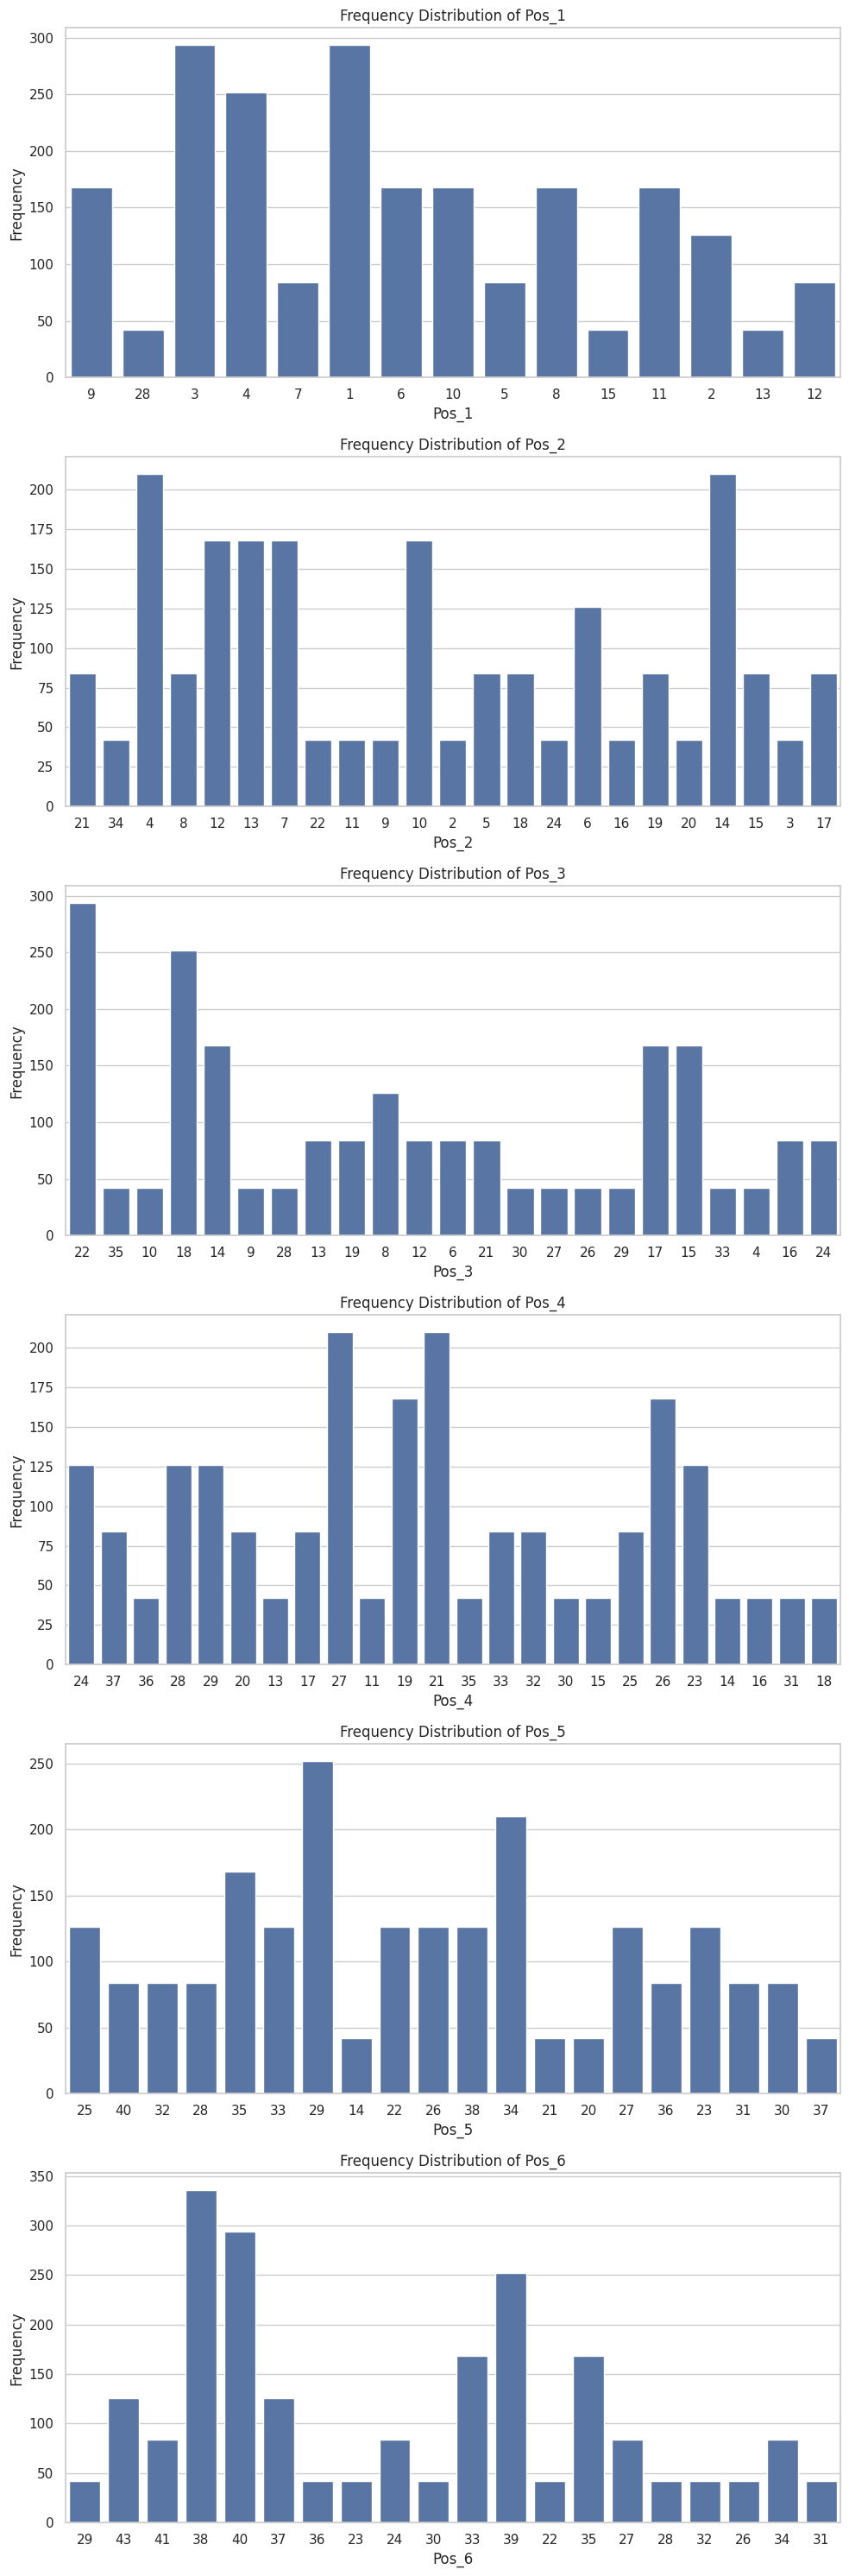

In [6]:
columns_of_interest = ['Pos_1', 'Pos_2', 'Pos_3','Pos_4','Pos_5','Pos_6']
# Set up the plotting environment

sns.set(style="whitegrid")
fig, axes = plt.subplots(len(columns_of_interest), 1, figsize=(10, 5 * len(columns_of_interest)))

# Plot each column
for i, column in enumerate(columns_of_interest):
    sns.countplot(data=draw_df, x=column, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Summary

Let us take a look at the Frequency by Position. Starting with Position 1, numbers 1 and 3 were drawn equally. Moving on to Position 2, 4 and 14 were drawn equally as well. The number 22 is the most frequently drawn in Position 3. Position 4 shows 27 and 21 as the most frequently drawn. In Position 5, 29 tops the list. And in Position 6, 38 is the most frequently drawn.